In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import re
from nltk.stem import PorterStemmer

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import spacy

from collections import Counter

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug3.csv"  ,index_col=[0])
df.head(5)

,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,1.0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...
1,2.0,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...
2,3.0,0,bihday your majesty,bihday majesti,DATE,,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...,love take time ur,,model,model love take with all the time in ur
4,5.0,0,factsguide: society now #motivation,factsguid societi,,motivation,factsguide society now motivation


Dataset contain 80.84 % of label which have zeros
Dataset contain 19.16 % of label which have ones


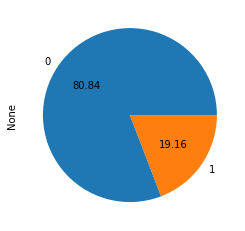

In [ ]:
Total = df.label.count()
zeros = df.label.value_counts()[0]
ones  = df.label.value_counts()[1]
print(f"Dataset contain {round(zeros/Total*100 , 2)} % of label which have zeros")
print(f"Dataset contain {round(ones/Total*100 , 2)} % of label which have ones")

df.groupby('label').size().plot(kind='pie', autopct='%.2f')

In [ ]:
def potter_text(words):
  ps = PorterStemmer()
  words=words.split() 

  cw=[]
  for w in words:
    cw.append(ps.stem(w))
  
  clean_text=" ".join(cw)
  return clean_text


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " I am", phrase)
    return phrase

stop_words =stopwords.words('english')

def stopword_removal(text):
  #removing stopwords from text
  word_tokens = word_tokenize(text)

  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

  return " ".join(filtered_sentence)

In [ ]:
def preprocessing_text(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    # #removing @user word
    # i = re.sub(r'\s*[@]+\w+\s*', ' ', i)
    # #remove hashtag words
    # i =re.sub(r'\s*[#]+\w+\s*', ' ', i)
    # # removing symbols from text
    # i = re.sub(r'[^\w]', ' ', i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #reomving ! @ # $ ð from sentence
    # i = re.sub('[!@#$ð]', ' ',i)
    #removing numbers from sentence
    # i = re.sub("\d", ' ', i )
    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")
    #removing stopwords
    i = stopword_removal(i)
    # # converting same meaning words into single word notation
    # i = potter_text(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
clean_text = []

for i in tqdm(df["clean_text_fordataaug"]):
  clean_text.append(preprocessing_text(i))

df["clean_text_fordataaug2"]=clean_text

df.head(2)

100%|██████████| 36766/36766 [00:06<00:00, 5506.20it/s]


,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug,clean_text_fordataaug2
0,1.0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...,father dysfunctional selfish drags kids dysfun...
1,2.0,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...,thanks lyft credit use cause offer wheelchair ...


In [ ]:
df.shape

(36766, 8)

In [ ]:
df =df[df["clean_text_fordataaug2"]!= '']

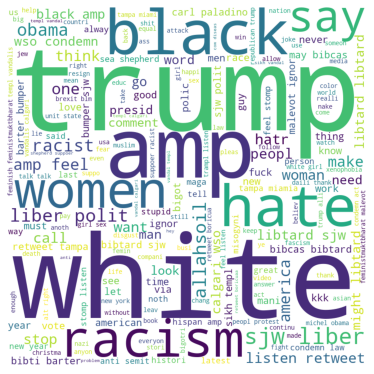

In [ ]:
df1 = df[df["label"]==1]

words = ""
for i in  df1["clean_text_fordataaug2"]:
    words += "".join(i)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

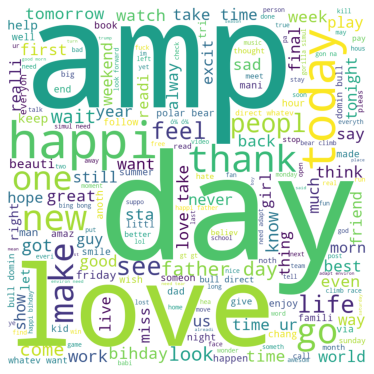

In [ ]:
df0 = df[df["label"]==0]

words = ""
for i in  df0["clean_tweet"]:
    words += "".join(i)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df.columns

Index(['id', 'label', 'tweet', 'clean_tweet', 'entity', 'hashtag',
       'clean_text_fordataaug', 'clean_text_fordataaug2'],
      dtype='object')

In [ ]:
X = df["clean_text_fordataaug2"]
y = df["label"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y ,shuffle=True ,  random_state=42)

# X_cv ,X_test,  y_cv ,y_test  = train_test_split(X_t, y_t, test_size=0.33,stratify=y_t ,  random_state=42)

In [ ]:
vectorizer = CountVectorizer(
                            max_features=650 ,
                             min_df=5)
bag = vectorizer.fit_transform(X_train)

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

X_train = bag.toarray()
X_test = vectorizer.transform(X_test).toarray()

['able', 'act', 'actually', 'adapt', 'affirmation', 'ago', 'allahsoil', 'almost', 'alone', 'already', 'also', 'altwaystoheal', 'always', 'amazing', 'america', 'american', 'americans', 'amp', 'angry', 'another', 'anti', 'anxiety', 'anymore', 'anyone', 'anything', 'app', 'around', 'arrived', 'asian', 'ask', 'ass', 'attack', 'away', 'awesome', 'aww', 'baby', 'back', 'bad', 'beach', 'bear', 'beautiful', 'beauty', 'become', 'bed', 'believe', 'best', 'better', 'big', 'bigot', 'bihday', 'bing', 'birds', 'black', 'blacks', 'blessed', 'blm', 'blog', 'blue', 'body', 'bong', 'book', 'booked', 'boy', 'boys', 'brexit', 'bring', 'buffalo', 'bull', 'business', 'buy', 'calgary', 'call', 'called', 'came', 'cant', 'cantwait', 'car', 'care', 'carl', 'cat', 'cause', 'celebrate', 'change', 'check', 'child', 'children', 'christmas', 'city', 'climb', 'close', 'coffee', 'cold', 'color', 'come', 'comes', 'coming', 'comments', 'community', 'complete', 'condemns', 'conference', 'cool', 'could', 'country', 'coupl

In [ ]:
def gridsearch(model ,parameters):

  result = GridSearchCV(model, parameters)
  result.fit(X_train, y_train)

  return result.best_params_


def performance_score(model , X_test , y_test):
  model =model.fit(X_train, y_train)

  test_pred = model.predict(X_test)
  print("Accuracy        : ", model.score(X_test, y_test))
  print("F1 score        : ", f1_score(y_test, test_pred, average='macro'))
  print("recall score    : " , recall_score(y_test, test_pred  , average='macro'))
  print("precision score : " , precision_score(y_test, test_pred ,  average='macro'))
  print("----------Classiffication Report--------")
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test,test_pred, target_names=target_names))
  print("----------confusion Matrix--------")
  print(plot_confusion_matrix(model,X_test , y_test) )

  return  

**Gaussian Naive Bayes**

In [ ]:
model =GaussianNB()

parameters = { 'var_smoothing':[ 1e-02 ,1e-03, 1e-05 , 1e-09,  1e-012,1e-015 ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'var_smoothing': 0.01}


Accuracy        :  0.7337503399510471
F1 score        :  0.6888348062707024
recall score    :  0.8060820115310622
precision score :  0.693594433499579
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.97      0.69      0.81      5945
     class 1       0.41      0.92      0.57      1409

    accuracy                           0.73      7354
   macro avg       0.69      0.81      0.69      7354
weighted avg       0.87      0.73      0.76      7354

----------confusion Matrix--------


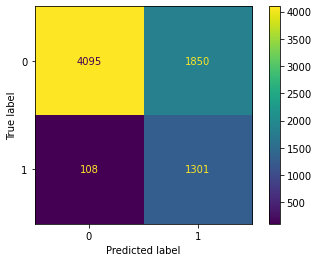

In [ ]:
model =GaussianNB(var_smoothing =0.01)
performance_score(model , X_test , y_test)

**Recall**

Layman definition: Of all the actual positive examples out there, how many of them did I correctly predict to be positive?
Calculation: Number of True Positives (TP) divided by the Total Number of True Positives (TP) and False Negatives (FN).

**Precision**

Layman definition: Of all the positive predictions I made, how many of them are truly positive?
Calculation: Number of True Positives (TP) divided by the Total Number of True Positives (TP) and False Positives (FP).

In [ ]:
%%time
model = KNeighborsClassifier( n_jobs=-1 )


parameters = {
              'n_neighbors':[5 , 10 , 15 , 20  ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'n_neighbors': 5}
CPU times: user 4min 37s, sys: 7.55 s, total: 4min 44s
Wall time: 3min 4s


Accuracy        :  0.8849557522123894
F1 score        :  0.8026133486649651
recall score    :  0.7852612229546603
precision score :  0.8249044600219966
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.91      0.95      0.93      5937
     class 1       0.74      0.62      0.68      1408

    accuracy                           0.88      7345
   macro avg       0.82      0.79      0.80      7345
weighted avg       0.88      0.88      0.88      7345

----------confusion Matrix--------


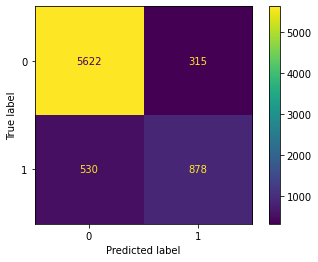

In [ ]:
model = KNeighborsClassifier( n_neighbors= 5 ,n_jobs=-1 )
performance_score(model , X_test , y_test)

**LOGISTIC REGRESSION** - BOW [clean Tweet] 

In [ ]:
model = LogisticRegression(random_state=0, n_jobs=-1 )


parameters = {'solver':('lbfgs', 'saga') , 
              'penalty':("l1", "l2") ,
              'C':[ 1 , 1.5 , 2 , 2.5 , 3.0  ]}
print( "best grid search param :", gridsearch(model ,parameters))



best grid search param : {'C': 2, 'penalty': 'l2', 'solver': 'lbfgs'}


Accuracy        :  0.8925754691324449
F1 score        :  0.8025279264286802
recall score    :  0.7683956494982096
precision score :  0.8602263213763544
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.90      0.97      0.94      5945
     class 1       0.82      0.57      0.67      1409

    accuracy                           0.89      7354
   macro avg       0.86      0.77      0.80      7354
weighted avg       0.89      0.89      0.88      7354

----------confusion Matrix--------


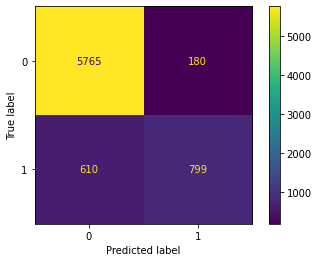

In [ ]:
model = LogisticRegression(random_state=0 , C= 2, penalty ='l2', solver='lbfgs')
performance_score(model , X_test , y_test)

In [ ]:
model= SVC(random_state=0)

parameters = {'kernel':('rbf', 'poly') , 
              'C':[ 0.0001 , 0.001 , 0.01 , 0.1 , 1  ]}
              
print( "best grid search param :", gridsearch(model ,parameters))


best grid search param : {'C': 1, 'kernel': 'rbf'}


Accuracy        :  0.9139243948871363
F1 score        :  0.8422512341547883
recall score    :  0.8040728800376769
precision score :  0.9049645065320446
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.92      0.98      0.95      5945
     class 1       0.89      0.63      0.74      1409

    accuracy                           0.91      7354
   macro avg       0.90      0.80      0.84      7354
weighted avg       0.91      0.91      0.91      7354

----------confusion Matrix--------


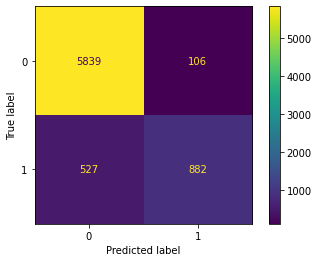

In [ ]:
model = SVC(random_state=0 , C= 1, kernel='rbf')
performance_score(model , X_test , y_test)

In [ ]:
%%time
model= DecisionTreeClassifier(random_state=0)

parameters = {'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
CPU times: user 8min 59s, sys: 1.07 s, total: 9min
Wall time: 8min 57s


Accuracy        :  0.8691868370954583
F1 score        :  0.7271430378653239
recall score    :  0.6846158391835259
precision score :  0.8604001272464772
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.87      0.98      0.92      5945
     class 1       0.85      0.39      0.53      1409

    accuracy                           0.87      7354
   macro avg       0.86      0.68      0.73      7354
weighted avg       0.87      0.87      0.85      7354

----------confusion Matrix--------


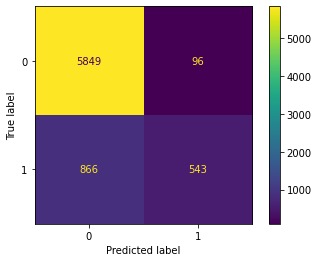

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",
                            max_depth= 15,
                            min_samples_leaf= 2,
                            min_samples_split= 5 ,random_state=0)

performance_score(model , X_test , y_test)

In [ ]:
%%time
model = RandomForestClassifier(random_state=0 , n_jobs=-1)

parameters = {"n_estimators" :[50 , 100 , 200] , 
              'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Accuracy        :  0.8478379113407669
F1 score        :  0.6343935786829262
recall score    :  0.607783496816393
precision score :  0.8940630990499003
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.84      1.00      0.91      5945
     class 1       0.94      0.22      0.36      1409

    accuracy                           0.85      7354
   macro avg       0.89      0.61      0.63      7354
weighted avg       0.86      0.85      0.81      7354

----------confusion Matrix--------


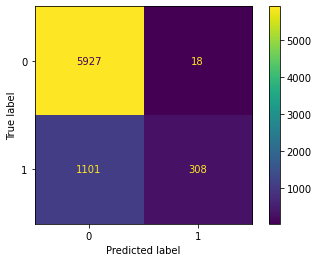

In [ ]:
model = RandomForestClassifier(criterion ='entropy' ,
                            max_depth=15,
                            min_samples_leaf =2,
                            min_samples_split =10 ,
                            random_state=0 , n_jobs=-1)

performance_score(model , X_test , y_test)

In [ ]:
%%time

model = XGBClassifier(random_state=0)


parameters = {'learning_rate':[0.1 , 0.01 , 0.001 ] , 
              'max_deptht':[3 , 6 , 9] ,              
              'min_child_weight':[3 , 6 , 9 ] , 
             }

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'learning_rate': 0.1, 'max_deptht': 3, 'min_child_weight': 3}
CPU times: user 1h 5min 30s, sys: 6.05 s, total: 1h 5min 36s
Wall time: 1h 5min 15s


Accuracy        :  0.863852961198094
F1 score        :  0.6998976587686432
recall score    :  0.6584311645382578
precision score :  0.881312485676017
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.86      0.99      0.92      5937
     class 1       0.90      0.33      0.48      1408

    accuracy                           0.86      7345
   macro avg       0.88      0.66      0.70      7345
weighted avg       0.87      0.86      0.84      7345

----------confusion Matrix--------


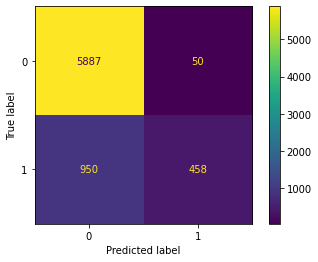

In [ ]:
model = XGBClassifier(random_state=0 , learning_rate =0.1 ,max_deptht =3 ,min_child_weight =3)

performance_score(model , X_test , y_test)

tfidf w2v

In [ ]:
df

(36725, 8)

In [ ]:
X = df["clean_text_fordataaug2"]
y = df["label"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y ,shuffle=True ,  random_state=42)


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def mean_w2v(data , dict_):
  vecs=[]
  l =[]
  l_text =[]
  for j ,text in tqdm(enumerate(data)):

      doc1 = nlp(text) 
      mean_vec = np.zeros([len(doc1) , len(doc1[0].vector)])

 
      for i , word1 in enumerate(doc1):
        vec1 = word1.vector
        try:
          idf = dict_[str(word1)]
        except: idf=0
        mean_vec[i] += vec1 * idf

      mean_vec = mean_vec.mean(axis=0)
      vecs.append(mean_vec)



  return vecs 

In [ ]:
X = df["clean_text_fordataaug2"]
y = df["label"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y ,shuffle=True ,  random_state=42)

tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

tfidf_dic= dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
X_train_vec =mean_w2v(X_train  , tfidf_dic)

X_test_vec =mean_w2v(X_test  , tfidf_dic)

29380it [04:29, 109.22it/s]
7345it [01:02, 117.23it/s]


In [ ]:
X_train = pd.DataFrame(X_train_vec)
X_test = pd.DataFrame(X_test_vec)

In [ ]:
model =GaussianNB()

parameters = { 'var_smoothing':[ 1e-02 ,1e-03, 1e-05 , 1e-09,  1e-012,1e-015 ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'var_smoothing': 1e-05}


Accuracy        :  0.7109598366235534
F1 score        :  0.6008321903410843
recall score    :  0.6245354871989219
precision score :  0.5950883877203664
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.86      0.76      0.81      5937
     class 1       0.33      0.48      0.39      1408

    accuracy                           0.71      7345
   macro avg       0.60      0.62      0.60      7345
weighted avg       0.76      0.71      0.73      7345

----------confusion Matrix--------


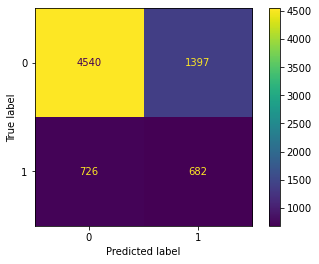

In [ ]:
model =GaussianNB(var_smoothing =1e-05)
performance_score(model , X_test , y_test)

In [ ]:
%%time
model = KNeighborsClassifier( n_jobs=-1 )


parameters = {
              'n_neighbors':[5 , 10 , 15 , 20  ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'n_neighbors': 5}
CPU times: user 2min 3s, sys: 5.12 s, total: 2min 8s
Wall time: 2min 2s


Accuracy        :  0.8589516678012253
F1 score        :  0.7450844106264153
recall score    :  0.7209561666436982
precision score :  0.7844276669280411
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.89      0.94      0.92      5937
     class 1       0.68      0.50      0.57      1408

    accuracy                           0.86      7345
   macro avg       0.78      0.72      0.75      7345
weighted avg       0.85      0.86      0.85      7345

----------confusion Matrix--------


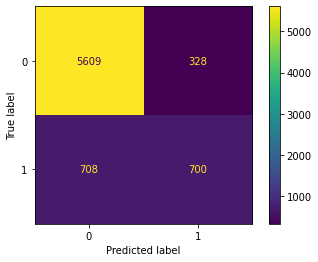

In [ ]:
model = KNeighborsClassifier( n_neighbors= 5 ,n_jobs=-1 )
performance_score(model , X_test , y_test)

In [ ]:
%%time
model = LogisticRegression(random_state=0, n_jobs=-1 )


parameters = {'solver':('lbfgs', 'saga') , 
              'penalty':("l1", "l2") ,
              'C':[0.001,0.01 ,0.1 , 1, 1.5 , 2  ]}
print( "best grid search param :", gridsearch(model ,parameters))


best grid search param : {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
CPU times: user 13.6 s, sys: 10.8 s, total: 24.4 s
Wall time: 7min


Accuracy        :  0.8113002042205582
F1 score        :  0.5662028950231945
recall score    :  0.561179015553463
precision score :  0.6774223372781065
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.83      0.97      0.89      5937
     class 1       0.53      0.16      0.24      1408

    accuracy                           0.81      7345
   macro avg       0.68      0.56      0.57      7345
weighted avg       0.77      0.81      0.77      7345

----------confusion Matrix--------


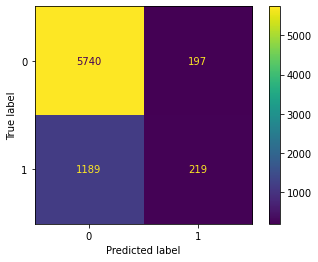

In [ ]:
model = LogisticRegression(random_state=0 , C= 0.1, penalty ='l2', solver='saga')
performance_score(model , X_test , y_test)

In [ ]:
model= SVC(random_state=0)

parameters = {'kernel':('rbf', 'poly') , 
              'C':[ 0.0001 , 0.001 , 0.01 , 0.1 , 1  ]}
              
print( "best grid search param :", gridsearch(model ,parameters))


best grid search param : {'C': 1, 'kernel': 'poly'}


Accuracy        :  0.8356705241660994
F1 score        :  0.5890490047130836
recall score    :  0.5776084493239623
precision score :  0.8700375198350907
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.83      1.00      0.91      5937
     class 1       0.91      0.16      0.27      1408

    accuracy                           0.84      7345
   macro avg       0.87      0.58      0.59      7345
weighted avg       0.85      0.84      0.79      7345

----------confusion Matrix--------


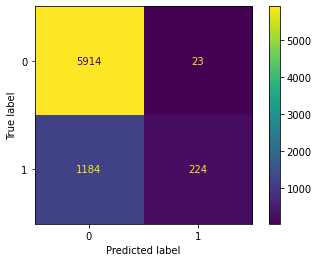

In [ ]:
model = SVC(random_state=0 , C= 1, kernel='poly')
performance_score(model , X_test , y_test)

In [ ]:
%%time
model= DecisionTreeClassifier(random_state=0)

parameters = {'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
CPU times: user 21min 55s, sys: 1.35 s, total: 21min 56s
Wall time: 21min 49s


Accuracy        :  0.8157930565010211
F1 score        :  0.4901641047346044
recall score    :  0.5211566261082273
precision score :  0.8626847214873694
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.81      1.00      0.90      5937
     class 1       0.91      0.04      0.08      1408

    accuracy                           0.82      7345
   macro avg       0.86      0.52      0.49      7345
weighted avg       0.83      0.82      0.74      7345

----------confusion Matrix--------


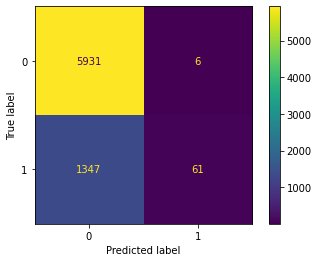

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",
                            max_depth=5,
                            min_samples_leaf= 2,
                            min_samples_split= 5 ,random_state=0)

performance_score(model , X_test , y_test)

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

def __init__(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

In [ ]:
%%time

model = XGBClassifier(random_state=0)


parameters = {'learning_rate':[0.1 , 0.01 , 0.001 ] , 
              'max_deptht':[3 , 6 , 9] ,              
              'min_child_weight':[3 , 6 , 9 ] , 
             }

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'learning_rate': 0.1, 'max_deptht': 3, 'min_child_weight': 9}
CPU times: user 30min 24s, sys: 2.29 s, total: 30min 27s
Wall time: 30min 20s


Accuracy        :  0.8254594962559564
F1 score        :  0.5504063216195569
recall score    :  0.5536838867770684
precision score :  0.8267564745561302
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.83      0.99      0.90      5937
     class 1       0.83      0.11      0.20      1408

    accuracy                           0.83      7345
   macro avg       0.83      0.55      0.55      7345
weighted avg       0.83      0.83      0.77      7345

----------confusion Matrix--------


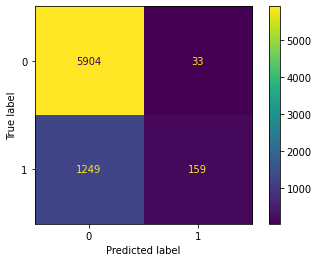

In [ ]:
model = XGBClassifier(random_state=0 , learning_rate =0.1 ,max_deptht =3 ,min_child_weight =9)

performance_score(model , X_test , y_test)